# K nearest neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x, y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h: X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1. Read the problem statement.

2. Get the dataset.

3. Explore the dataset.

4. Pre-processing of dataset.

5. Visualization

6. Transform the dataset for building machine learning model.

7. Split data into train, test set.

8. Build Model.

9. Apply the model.

10. Evaluate the model.

11. Finding Optimal K value

12. Repeat 7, 8, 9 steps.

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Download the dataset here:**
- https://www.kaggle.com/uciml/iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Load data

### Question 1

Import the data set and print 10 random rows from the data set

Hint: use **sample()** function to get random rows

In [1]:
import pandas as pd
import numpy as np
from random import sample
from sklearn  import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import array as arr

In [2]:
Iris = pd.read_csv('iris.csv')
Iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## Data Pre-processing

In [3]:
## 10 random sample data
Iris.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
49,50,5.0,3.3,1.4,0.2,Iris-setosa
145,146,6.7,3.0,5.2,2.3,Iris-virginica
63,64,6.1,2.9,4.7,1.4,Iris-versicolor
105,106,7.6,3.0,6.6,2.1,Iris-virginica
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
46,47,5.1,3.8,1.6,0.2,Iris-setosa
38,39,4.4,3.0,1.3,0.2,Iris-setosa
104,105,6.5,3.0,5.8,2.2,Iris-virginica
72,73,6.3,2.5,4.9,1.5,Iris-versicolor
89,90,5.5,2.5,4.0,1.3,Iris-versicolor


### Question 2 - Estimating missing values

Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

Calculate the number of missing values per column
- don't use loops

In [4]:
##count the missing values
Iris.isnull().sum()


Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

Fill missing values with median of that particular column

In [90]:
## fill the mssing null
Iris.fillna(Iris.median(),inplace = True)

In [91]:
Iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.40,0.2,Iris-setosa
1,2,4.9,3.0,1.40,0.2,Iris-setosa
2,3,4.7,3.2,1.30,0.2,Iris-setosa
3,4,4.6,3.1,1.50,0.2,Iris-setosa
4,5,5.0,3.6,1.40,0.2,Iris-setosa
5,6,5.4,3.9,1.70,0.4,Iris-setosa
6,7,4.6,3.4,1.40,0.3,Iris-setosa
7,8,5.0,3.4,1.50,0.2,Iris-setosa
8,9,4.4,2.9,1.40,0.2,Iris-setosa
9,10,4.9,3.1,1.50,0.1,Iris-setosa


### Question 3 - Dealing with categorical data

Change all the classes to numericals (0 to 2)

Hint: use **LabelEncoder()**

In [92]:
#le = preprocessing.LabelEncoder()
# Fit the encoder to the species column
#le.fit(Iris['Species'])

In [93]:
# View the labels 
#list(le.classes_)

In [94]:
# Apply the fitted encoder to the species column

Iris['Species'] = preprocessing.LabelEncoder().fit_transform(Iris['Species'])

In [95]:
Iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.40,0.2,0
1,2,4.9,3.0,1.40,0.2,0
2,3,4.7,3.2,1.30,0.2,0
3,4,4.6,3.1,1.50,0.2,0
4,5,5.0,3.6,1.40,0.2,0
5,6,5.4,3.9,1.70,0.4,0
6,7,4.6,3.4,1.40,0.3,0
7,8,5.0,3.4,1.50,0.2,0
8,9,4.4,2.9,1.40,0.2,0
9,10,4.9,3.1,1.50,0.1,0


### Question 4

Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

Hint: use **corr()**

In [96]:
##correlation of each independen variablewith target variable
## drop the id as it has no meaning in finidng the correlation

In [97]:
Iris.drop(['Id'], inplace = True , axis= 1)

In [98]:
Iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,4.7,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
5,5.4,3.9,1.70,0.4,0
6,4.6,3.4,1.40,0.3,0
7,5.0,3.4,1.50,0.2,0
8,4.4,2.9,1.40,0.2,0
9,4.9,3.1,1.50,0.1,0


In [99]:
###### 
##Iris.corr()['Species']

In [100]:
##check if there the correlation range lies between -0.1 to 0.1
##~ ((Iris.corr()['Species'] >= -0.1)[:-1] | (Iris.corr()['Species'] <= 0.1)[:-1])
 ##Iris = Iris.loc[:,((Iris.corr()['Species'] >= -0.1) | (Iris.corr()['Species'] <= 0.1))]
   

In [101]:
## Iris contains only the value which are not in range -0.1 to 0.1
Iris = Iris.loc[:,((Iris.corr()['Species'] <= -0.1) | (Iris.corr()['Species'] >= 0.1))]

In [102]:
Iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,4.7,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
5,5.4,3.9,1.70,0.4,0
6,4.6,3.4,1.40,0.3,0
7,5.0,3.4,1.50,0.2,0
8,4.4,2.9,1.40,0.2,0
9,4.9,3.1,1.50,0.1,0


### Question 5

Observe the independent variables variance and drop such variables having no variance or almost zero variance (variance < 0.1). They will be having almost no influence on the classification

Hint: use **var()**

In [103]:
##contain value which are only greater than 0.1
Iris =  Iris.loc[:,Iris.var() > 0.1 ]
Iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,4.7,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
5,5.4,3.9,1.70,0.4,0
6,4.6,3.4,1.40,0.3,0
7,5.0,3.4,1.50,0.2,0
8,4.4,2.9,1.40,0.2,0
9,4.9,3.1,1.50,0.1,0


### Question 6

Plot the scatter matrix for all the variables.

Hint: use **pandas.plotting.scatter_matrix()**

you can also use pairplot()

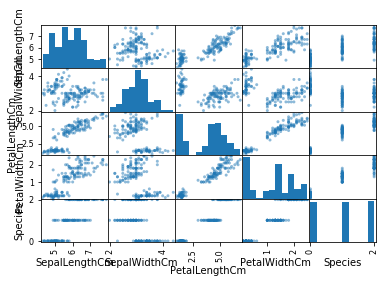

In [104]:
##sns.pairplot(Iris)
pd.plotting.scatter_matrix(Iris)
plt.show()

## Split the dataset into training and test sets


### Question 7

Split the dataset into training and test sets with 80-20 ratio

Hint: use **train_test_split()**

In [200]:
## splitting the data set into train and test
y = Iris['Species']
x = Iris.drop('Species',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=4,stratify=y)
sc=StandardScaler()


## Build Model

### Question 8

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [201]:
#sc=StandardScaler()
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=4)
y = Iris['Species']
x = Iris.drop('Species',axis=1)
arr=[3,5,9]
for i in arr:
   
    knn=KNeighborsClassifier(n_neighbors=i)
    scaledX_train = sc.fit_transform(x_train)
    scaledX_test = sc.transform(x_test)
##pass the training independent and dependent data and learn something
    knn.fit(scaledX_train,y_train)
##predict the dependent target with the test data
    y_predict = knn.predict(scaledX_test)
    print("The accuracy score of nieghbour ",i," is")
    print(accuracy_score(y_test, y_predict))


The accuracy score of nieghbour  3  is
0.967741935483871
The accuracy score of nieghbour  5  is
0.9354838709677419
The accuracy score of nieghbour  9  is
0.9354838709677419


## Find optimal value of K

### Question 9 - Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

In [ ]:
y = Iris['Species']
x = Iris.drop('Species',axis=1)
neighbours = np.array([1,3,5,7,9,11,13,15,17,19])
testnew = []
trainnew = []
for i in neighbours:
    x_trainnew, x_testnew, y_trainnew, y_testnew = train_test_split(x, y,test_size=0.20,random_state = 3,stratify=y)
    sc=StandardScaler()
    knn=KNeighborsClassifier(n_neighbors = i)
    sc.fit(x_trainnew)
    scaledX_train = sc.fit_transform(x_trainnew)
    scaledX_test = sc.transform(x_testnew)        ##pass the training independent and dependent data and learn something
    knn.fit(scaledX_train,y_trainnew)
    ##predict the dependent target with the test data
    y_predict = knn.predict(scaledX_test)
    y_train_predict = knn.predict(scaledX_train)
    print("The accuracy of neighbour",i, "is",accuracy_score(y_testnew, y_predict))
    testnew.append(accuracy_score(y_testnew, y_predict))
    ## used train accuracy to compare the accuracy between trained and test dataandpredict the k value
    trainnew.append(accuracy_score(y_trainnew, y_train_predict))
    ##print(classification_report(y_testnew, y_predict))
    ##print(confusion_matrix(y_testnew, y_predict))
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.plot(neighbours,trainnew, '--')
plt.plot(neighbours,testnew, label = 'test')
print('The optimal value of K is',13)

The accuracy of neighbour 1 is 0.8387096774193549
The accuracy of neighbour 3 is 0.8709677419354839
The accuracy of neighbour 5 is 0.9032258064516129
The accuracy of neighbour 7 is 0.9032258064516129
The accuracy of neighbour 9 is 0.8709677419354839
The accuracy of neighbour 11 is 0.8709677419354839
The accuracy of neighbour 13 is 0.9032258064516129
The accuracy of neighbour 15 is 0.8709677419354839
The accuracy of neighbour 17 is 0.8709677419354839
The accuracy of neighbour 19 is 0.8387096774193549
The optimal value of K is 13


#### ## Plot accuracy

### Question 10

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

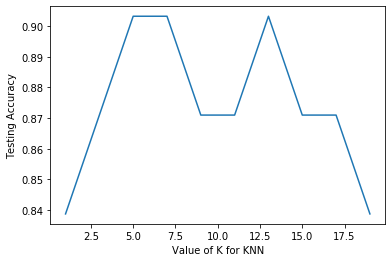

In [180]:
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.plot(neighbours,testnew)

# Breast cancer dataset

## Read data

### Question 1
Read the data given in bc2.csv file

In [181]:
bc2 = pd.read_csv('bc2.csv')
bc2

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


## Data preprocessing

### Question 2
Observe the no.of records in dataset and type of each column

In [182]:
##bc2.count()

In [183]:
bc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


### Question 3
Use summary statistics to check if missing values, outlier and encoding treament is necessary

Hint: use **describe()**

In [184]:
bc2.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


#### Check Missing Values

In [185]:
bc2.isnull()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


### Question 4
#### Check how many `?` are there in Bare Nuclei feature (they are also unknown or missing values). 

In [186]:
missing_value=['?']
bc2=pd.read_csv('bc2.csv',na_values = missing_value)
bc2.isnull().sum()['Bare Nuclei']

16

#### Replace them with the 'top' value of the describe function of Bare Nuclei feature

Hint: give value of parameter include='all' in describe function

bc2.describe(include='all)

In [187]:
bc2.describe(include='all')

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [188]:
fillnullvalues = bc2.describe(include='all')['Bare Nuclei'][0]

bc2['Bare Nuclei'] = bc2['Bare Nuclei'].fillna(fillnullvalues)
bc2
##bc2 = bc2.replace(to_replace = '?',value=fillnullvalues)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4
6,1018099,1,1,1,1,2,10.0,3,1,1,2
7,1018561,2,1,2,1,2,1.0,3,1,1,2
8,1033078,2,1,1,1,2,1.0,1,1,5,2
9,1033078,4,2,1,1,2,1.0,2,1,1,2


### Question 5
#### Find the distribution of target variable (Class) 

In [189]:
x=bc2.groupby('Class').groups
x

{2: Int64Index([  0,   1,   2,   3,   4,   6,   7,   8,   9,  10,
             ...
             685, 686, 687, 688, 689, 690, 692, 693, 694, 695],
            dtype='int64', length=458),
 4: Int64Index([  5,  12,  14,  15,  18,  20,  21,  23,  25,  32,
             ...
             658, 668, 669, 670, 680, 681, 691, 696, 697, 698],
            dtype='int64', length=241)}

#### Plot the distribution of target variable using histogram

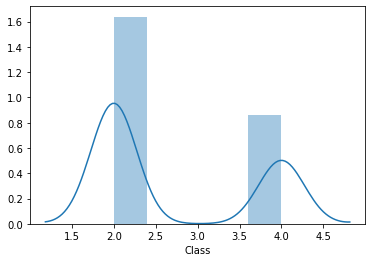

In [190]:
sns.distplot(bc2['Class'])

#### Convert the datatype of Bare Nuclei to `int`

In [191]:
bc2['Bare Nuclei'].astype('int32').dtypes

dtype('int32')

## Scatter plot

### Question 6
Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

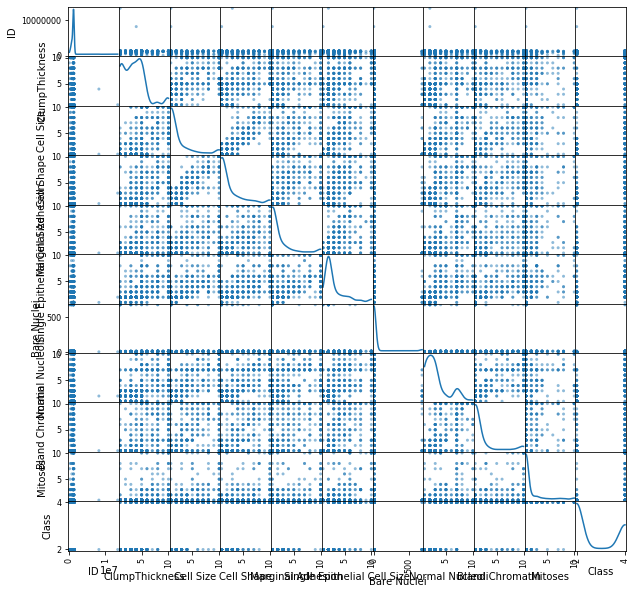

In [192]:
pd.plotting.scatter_matrix(bc2 ,alpha=0.5, figsize=(10, 10), diagonal='kde')
plt.show()


In [193]:
bc2.drop('Bare Nuclei',axis=1)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,3,1,1,2
1,1002945,5,4,4,5,7,3,2,1,2
2,1015425,3,1,1,1,2,3,1,1,2
3,1016277,6,8,8,1,3,3,7,1,2
4,1017023,4,1,1,3,2,3,1,1,2
5,1017122,8,10,10,8,7,9,7,1,4
6,1018099,1,1,1,1,2,3,1,1,2
7,1018561,2,1,2,1,2,3,1,1,2
8,1033078,2,1,1,1,2,1,1,5,2
9,1033078,4,2,1,1,2,2,1,1,2


## Train test split

### Question 7
#### Divide the dataset into feature set and target set

In [194]:
y = bc2['Class']
x = bc2.drop('Class',axis=1)




#### Divide the Training and Test sets in 70:30 

In [195]:
y = bc2['Class']
x = bc2.drop('Class',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=4,stratify=y)

## Scale the data

### Question 8
Standardize the data

Hint: use **StandardScaler()**

In [196]:
y = bc2['Class']
x = bc2.drop('Class',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=4,stratify=y)
sc=StandardScaler()
scaledX_train = sc.fit_transform(x_train)
scaledX_test = sc.transform(x_test)



## Build Model

### Question 9

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [197]:
y = bc2['Class']
x = bc2.drop('Class',axis=1)
arr=[3,5,9]
for i in arr:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=6)
    sc=StandardScaler()
    knn=KNeighborsClassifier(n_neighbors=i)
    scaledX_train = sc.fit_transform(x_train)
    scaledX_test = sc.transform(x_test)
##pass the training independent and dependent data and learn something
    knn.fit(scaledX_train,y_train)
##predict the dependent target with the test data
    y_predict = knn.predict(scaledX_test)
    print("The accuracy score of nieghbour ",i," is")
    print(accuracy_score(y_test, y_predict))


The accuracy score of nieghbour  3  is
0.9380952380952381
The accuracy score of nieghbour  5  is
0.9428571428571428
The accuracy score of nieghbour  9  is
0.9476190476190476


## Find optimal value of K

### Question 10
Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

The accuracy of neighbour 1 is 0.9333333333333333
The accuracy of neighbour 3 is 0.9619047619047619
The accuracy of neighbour 5 is 0.9523809523809523
The accuracy of neighbour 7 is 0.9571428571428572
The accuracy of neighbour 9 is 0.9571428571428572
The accuracy of neighbour 11 is 0.9523809523809523
The accuracy of neighbour 13 is 0.9523809523809523
The accuracy of neighbour 15 is 0.9571428571428572
The accuracy of neighbour 17 is 0.9523809523809523
The accuracy of neighbour 19 is 0.9428571428571428
The optimal value of K is 15


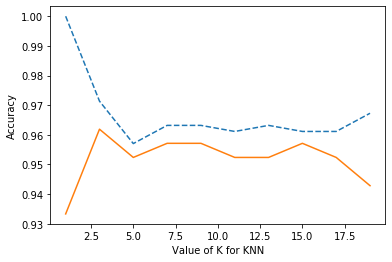

In [198]:
y = bc2['Class']
x = bc2.drop('Class',axis=1)
neighbours = np.array([1,3,5,7,9,11,13,15,17,19])
testnew = []
trainnew = []
for i in neighbours:
    x_trainnew, x_testnew, y_trainnew, y_testnew = train_test_split(x, y, test_size=0.30,random_state = 4,stratify=y)
    sc=StandardScaler()
    knn=KNeighborsClassifier(n_neighbors = i)
    sc.fit(x_trainnew)
    scaledX_train = sc.fit_transform(x_trainnew)
    scaledX_test = sc.transform(x_testnew)        ##pass the training independent and dependent data and learn something
    knn.fit(scaledX_train,y_trainnew)
    ##predict the dependent target with the test data
    y_predict = knn.predict(scaledX_test)
    y_train_predict = knn.predict(scaledX_train)
    print("The accuracy of neighbour",i, "is",accuracy_score(y_testnew, y_predict))
    testnew.append(accuracy_score(y_testnew, y_predict))
    trainnew.append(accuracy_score(y_trainnew, y_train_predict))
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.plot(neighbours,trainnew, '--')
plt.plot(neighbours,testnew, label = 'test')
print('The optimal value of K is',15)

## Plot accuracy

### Question 11

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

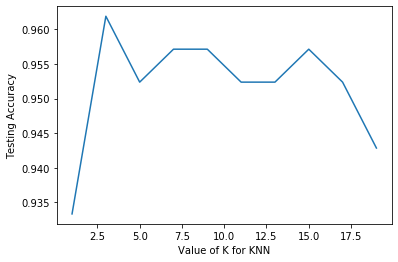

In [199]:
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.plot(neighbours,testnew)